In [34]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import RFE
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [35]:
path = "./data/forecast_data_origin.csv"
data_org = pd.read_csv(path)
print(data_org['condition'].value_counts())
data_org.head(10)
num_columns = data_org.shape[1]
print(num_columns)
data_org.describe()

condition
{'text': 'Clear', 'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png', 'code': 1000}                                  6377
{'text': 'Sunny', 'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png', 'code': 1000}                                    5895
{'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/night/116.png', 'code': 1003}                          2649
{'text': 'Partly cloudy', 'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png', 'code': 1003}                            2477
{'text': 'Patchy rain possible', 'icon': '//cdn.weatherapi.com/weather/64x64/day/176.png', 'code': 1063}                     1898
{'text': 'Light rain shower', 'icon': '//cdn.weatherapi.com/weather/64x64/day/353.png', 'code': 1240}                        1859
{'text': 'Light rain shower', 'icon': '//cdn.weatherapi.com/weather/64x64/night/353.png', 'code': 1240}                      1811
{'text': 'Patchy rain possible', 'icon': '//cdn.weatherapi.com/weather/64x64/nig

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
count,2.956800e+04,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,...,29568.000000,29568.000000,29568.000000,29568.000000,29568.0,29568.0,29568.000000,29568.000000,29568.000000,29568.000000
mean,1.634580e+09,25.152307,77.273793,0.477070,5.077486,8.169619,177.818452,1008.341112,29.775472,0.101552,...,18.650761,65.571567,0.089928,12.155202,0.0,0.0,9.263460,5.488433,7.947697,12.791274
std,1.995536e+05,4.797702,8.635461,0.499482,2.847123,4.582337,103.545331,3.438631,0.101294,0.406883,...,5.715956,10.288746,0.286084,24.999675,0.0,0.0,1.986747,1.281815,4.141102,6.665310
min,1.634227e+09,1.500000,34.700000,0.000000,0.000000,0.000000,0.000000,999.000000,29.490000,0.000000,...,-8.200000,17.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.634408e+09,22.500000,72.600000,0.000000,3.100000,4.900000,83.000000,1006.000000,29.690000,0.000000,...,16.000000,60.800000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,4.900000,7.900000
50%,1.634580e+09,25.100000,77.200000,0.000000,4.500000,7.200000,174.000000,1008.000000,29.780000,0.000000,...,20.400000,68.700000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,7.300000,11.800000
75%,1.634753e+09,28.100000,82.600000,1.000000,6.500000,10.400000,273.000000,1011.000000,29.850000,0.040000,...,22.900000,73.300000,0.000000,3.000000,0.0,0.0,10.000000,6.000000,10.400000,16.700000
max,1.634958e+09,39.300000,102.700000,1.000000,22.400000,36.000000,359.000000,1021.000000,30.160000,20.930000,...,30.200000,86.400000,1.000000,94.000000,0.0,0.0,10.000000,6.000000,32.700000,52.600000


In [36]:
path = "./data/forecast_data.csv"
data = pd.read_csv(path)

In [37]:
data.dropna()
data.describe()

,time_epoch,temp_c,temp_f,is_day,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,...,dewpoint_c,dewpoint_f,will_it_rain,chance_of_rain,will_it_snow,chance_of_snow,vis_km,vis_miles,gust_mph,gust_kph
count,2.956800e+04,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,29568.000000,...,29568.000000,29568.000000,29568.000000,29568.000000,29568.0,29568.0,29568.000000,29568.000000,29568.000000,29568.000000
mean,1.634580e+09,25.152307,77.273793,0.477070,5.077486,8.169619,177.818452,1008.341112,29.775472,0.101552,...,18.650761,65.571567,0.089928,12.155202,0.0,0.0,9.263460,5.488433,7.947697,12.791274
std,1.995536e+05,4.797702,8.635461,0.499482,2.847123,4.582337,103.545331,3.438631,0.101294,0.406883,...,5.715956,10.288746,0.286084,24.999675,0.0,0.0,1.986747,1.281815,4.141102,6.665310
min,1.634227e+09,1.500000,34.700000,0.000000,0.000000,0.000000,0.000000,999.000000,29.490000,0.000000,...,-8.200000,17.200000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.634408e+09,22.500000,72.600000,0.000000,3.100000,4.900000,83.000000,1006.000000,29.690000,0.000000,...,16.000000,60.800000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,4.900000,7.900000
50%,1.634580e+09,25.100000,77.200000,0.000000,4.500000,7.200000,174.000000,1008.000000,29.780000,0.000000,...,20.400000,68.700000,0.000000,0.000000,0.0,0.0,10.000000,6.000000,7.300000,11.800000
75%,1.634753e+09,28.100000,82.600000,1.000000,6.500000,10.400000,273.000000,1011.000000,29.850000,0.040000,...,22.900000,73.300000,0.000000,3.000000,0.0,0.0,10.000000,6.000000,10.400000,16.700000
max,1.634958e+09,39.300000,102.700000,1.000000,22.400000,36.000000,359.000000,1021.000000,30.160000,20.930000,...,30.200000,86.400000,1.000000,94.000000,0.0,0.0,10.000000,6.000000,32.700000,52.600000


In [38]:
from sklearn import preprocessing 
X = np.array(data[['temp_c','wind_kph','pressure_mb','humidity','precip_mm','vis_km','cloud']]) # input features
scaler = preprocessing.StandardScaler().fit(X) # use to fit with data using fit method. The fit method caculates the mean and standard devitation for each feature in X
X = scaler.transform(X) # được gọi trên đối tượng X để chuẩn hóa các đặc trưng trong X
Y = []
print(len(X))
condition = np.array(data['condition'])
count = [0,0,0,0]
for i in range(len(X)):
  if condition[i][10:15] == 'Rainy':
    Y.append(3) 
    count[3]+=1
  elif condition[i][10:15]  == 'Sunny':
    Y.append(2)
    count[2]+=1
  elif condition[i][10:15] == 'Cloud':
    Y.append(1)
    count[1]+=1
  else:
    Y.append(0)
    count[0]+=1

Y = (np.array(Y))
print(X.shape,Y.shape)
count



29568
(29568, 7) (29568,)


[6377, 7924, 5895, 9372]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [40]:
from sklearn.metrics import recall_score, confusion_matrix, roc_auc_score
def compute_recall_score(model_dict, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):

  model_name = list(model_dict.keys())[0]
  model_obj = list(model_dict.values())[0]

  # Make predictions

  # 1. Training predictions
  train_preds = model_obj.predict(X_train)

  # 2. Testing predictions
  test_preds = model_obj.predict(X_test)

  # Compute Recall Score
  # Compute Recall Score
  # 2. Testing score
  test_recall = recall_score(Y_test, test_preds, average = 'macro')
  # Display the result
  result_arr = np.array([test_recall])
  result_df = pd.DataFrame(data = result_arr.reshape(1,1), columns = ['Test_Recall'], index=[model_name])
  return result_df

In [41]:
from sklearn.metrics import precision_score, f1_score
import pandas as pd
import numpy as np

def compute_scores(model_dict, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    model_name = list(model_dict.keys())[0]
    model_obj = list(model_dict.values())[0]

    # Make predictions
    train_preds = model_obj.predict(X_train)
    test_preds = model_obj.predict(X_test)
    test_f1_score = f1_score(Y_test, test_preds, average='macro')
    # Display the results
    result_arr = np.array([test_f1_score ])
    result_df = pd.DataFrame(data = result_arr.reshape(1,1), columns = [ 'Test_F1_Score'], index=[model_name])

    return result_df

In [42]:
from sklearn.metrics import accuracy_score

def compute_accuracy_score(model_dict, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):
    model_name = list(model_dict.keys())[0]
    model_obj = list(model_dict.values())[0]

    # Make predictions
    # 1. Training predictions
    train_preds = model_obj.predict(X_train)

    # 2. Testing predictions
    test_preds = model_obj.predict(X_test)

    # Compute Accuracy Score
    # 1. Training score
    train_accuracy = accuracy_score(Y_train, train_preds)

    # 2. Testing score
    test_accuracy = accuracy_score(Y_test, test_preds)

    # Display the result
    result_arr = np.array([train_accuracy, test_accuracy])
    result_df = pd.DataFrame(data=result_arr.reshape(1, 2), columns=['Train_Accuracy', 'Test_Accuracy'], index=[model_name])

    return result_df

In [43]:
def plot_confusion_matrix(model_dict, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test):

  model_name = list(model_dict.keys())[0]
  model_obj = list(model_dict.values())[0]

  # Make predictions

  # 1. Training predictions
  train_preds = model_obj.predict(X_train)

  # 2. Testing predictions
  test_preds = model_obj.predict(X_test)



  # 1. Training Score
  train_recall = confusion_matrix(Y_train, train_preds)

  # 2. Testing score
  test_f1_score = confusion_matrix(Y_test, test_preds)

  # Plot the heatmap
  fig, ax = plt.subplots(1, 2, figsize=(15,8))
  sns.heatmap(train_recall, annot=True, cbar=False, ax=ax[0], fmt='g')
  ax[0].set_xlabel("Predicted Values")
  ax[0].set_ylabel("Actual Values")
  ax[0].set_title("Training Set Results")
  # Plot the testing matrix
  sns.heatmap(test_f1_score, annot=True, cbar=False, ax=ax[1], fmt='g')
  ax[1].set_xlabel("Predicted Values")
  ax[1].set_ylabel("Actual Values")
  ax[1].set_title("Testing Set Results")

  fig.show()

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1244
           1       0.88      0.92      0.90      1601
           2       0.90      0.81      0.85      1220
           3       0.97      0.94      0.95      1849

    accuracy                           0.90      5914
   macro avg       0.90      0.89      0.89      5914
weighted avg       0.90      0.90      0.90      5914

             Test_F1_Score
K_Neighbors       0.894143
             Test_Recall
K_Neighbors     0.893614
             Train_Accuracy  Test_Accuracy
K_Neighbors             1.0       0.900744


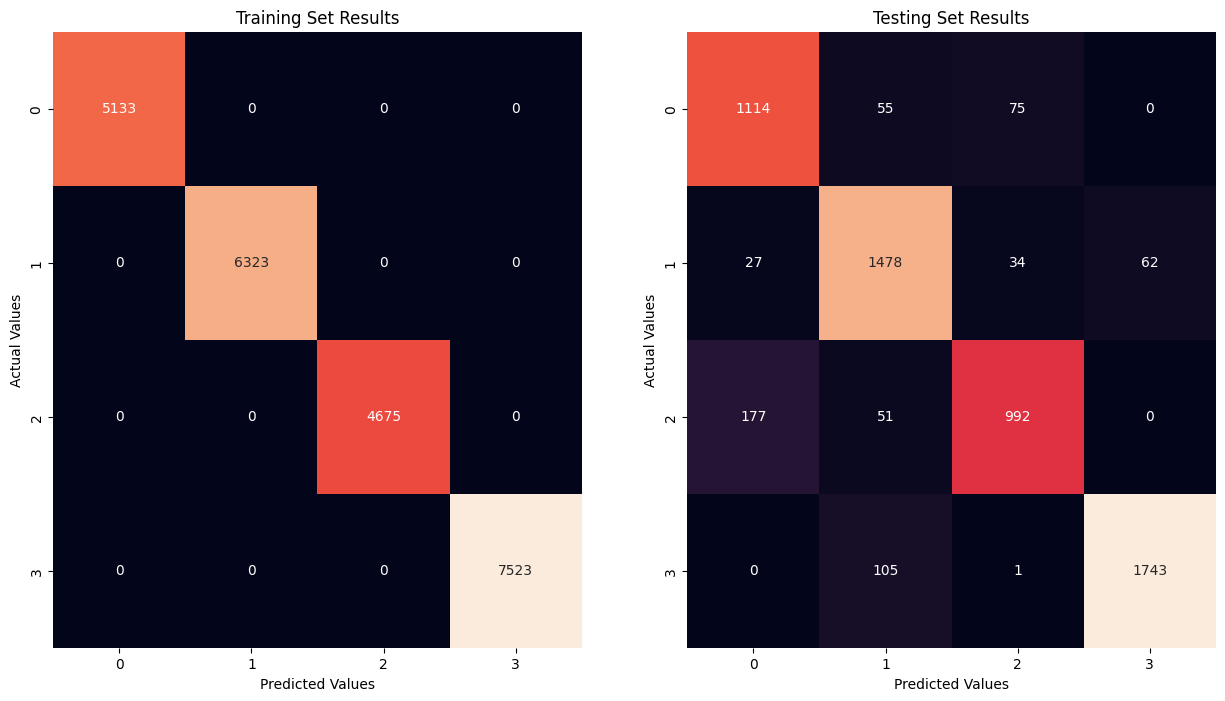

In [44]:

#--------------------------------#
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
knn = KNeighborsClassifier(n_neighbors=16, weights='distance', p= 1)
knn.fit(X_train, Y_train) # Huấn luyện mô hình trên tập dữ liệu
Y_pred = knn.predict(X_test) # Dự đoán nhãn của tập dữ liệu kiểm tra
#print("Độ chính xác trên tập kiểm tra: {:.3f}".format(accuracy_score(Y_pred, Y_test)))
#print('cross validation',cross_val_score(knn,X_train,Y_train,cv = 5).mean())
print(classification_report(Y_test, Y_pred))
model_dict={'K_Neighbors' : knn}
knn_results1 = compute_recall_score(model_dict=model_dict)
knn_results2 =  compute_scores(model_dict=model_dict)
knn_results3 = compute_accuracy_score(model_dict=model_dict)
print(knn_results2)
print (knn_results1)
print (knn_results3)
plot_confusion_matrix(model_dict=model_dict)
#---------------------------#
# import optuna
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import cross_val_score
# # Load the iris dataset
# # Define the objective function.
# def objective(trial):
#     # Define the hyperparameters to optimize.
#     n_neighbors = trial.suggest_int("n_neighbors", 1, 20)
#     weights = trial.suggest_categorical("weights", ["uniform", "distance"])
#     p = trial.suggest_int("p", 1, 2)

#     # Train a KNN classifier with the chosen hyperparameters using cross-validation.
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
#     score = cross_val_score(clf, X_train, Y_train, n_jobs=-1, cv=5).mean()
#     return score
# # Define the search space for the hyperparameters.
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)
# # Print the best hyperparameters and their score.
# best_params = study.best_params
# best_score = study.best_value
# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")

# # Use the best hyperparameters to train the final model.
# clf = KNeighborsClassifier(**best_params)
# clf.fit(X_train, Y_train)
# y_pred = clf.predict(X_test)
# test_accuracy = metrics.accuracy_score(y_pred,Y_test)
# print(test_accuracy)


In [45]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(penalty ='l2',C = 611.9717284983775 ,solver='saga')
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# print('cross validation',cross_val_score(logreg,X_train,Y_train,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(classification_report(Y_test, Y_pred))
#------------------------------------------#
# import optuna
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import cross_val_score

# # Load the iris dataset.
# # Define the objective function.
# def objective(trial):
#     # Define the hyperparameters to optimize.
#     penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
#     C = trial.suggest_float("C", 1e-3, 1e3, log=True)
#     # Train a logistic regression model with the chosen hyperparameters using cross-validation.
#     clf = LogisticRegression(penalty=penalty, C=C, solver="saga")
#     score = cross_val_score(clf, X_train, Y_train, n_jobs=-1, cv=5).mean()

#     return score

# # Define the search space for the hyperparameters.
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters and their score.
# best_params = study.best_params
# best_score = study.best_value
# print(f"Best parameters: {best_params}")
# print(f"Best score: {best_score}")

# # Use the best hyperparameters to train the final model.
# clf = LogisticRegression(**best_params,solver='saga')
# clf.fit(X_train, Y_train)



              precision    recall  f1-score   support

           0       0.77      0.89      0.82      1244
           1       0.94      0.97      0.95      1601
           2       0.88      0.71      0.79      1220
           3       1.00      1.00      1.00      1849

    accuracy                           0.91      5914
   macro avg       0.90      0.89      0.89      5914
weighted avg       0.91      0.91      0.91      5914

               Test_Recall
decision tree     0.890298
               Test_F1_Score
decision tree       0.890238
               Train_Accuracy  Test_Accuracy
decision tree        0.926144       0.906324


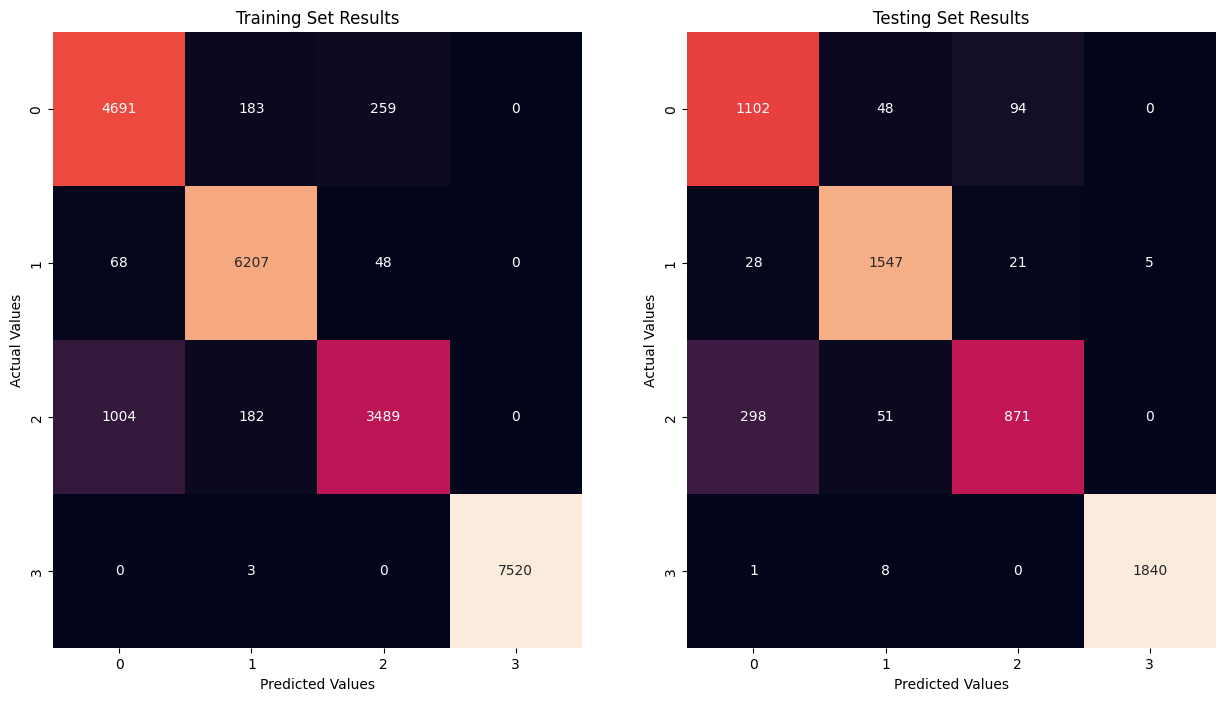

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier( criterion= 'gini',max_depth= 11,min_samples_split = 3,max_features =None)
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)
#print('cross validation',cross_val_score(dtree,X_train,Y_train,cv = 5).mean())
#print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
model_dict={'decision tree' : dtree}
dtree_results = compute_recall_score(model_dict=model_dict)
dtree_results2 = compute_scores(model_dict=model_dict)
dtree_results3 = compute_accuracy_score(model_dict=model_dict)
print (dtree_results)
print (dtree_results2)
print(dtree_results3)
plot_confusion_matrix(model_dict=model_dict)
#------------------------------------------#

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1244
           1       0.92      0.97      0.94      1601
           2       0.88      0.76      0.82      1220
           3       1.00      1.00      1.00      1849

    accuracy                           0.91      5914
   macro avg       0.90      0.90      0.90      5914
weighted avg       0.91      0.91      0.91      5914

                        Test_Recall
Support Vector Machine     0.898504
                        Test_F1_Score
Support Vector Machine       0.899078
                        Train_Accuracy  Test_Accuracy
Support Vector Machine        0.931809       0.913088


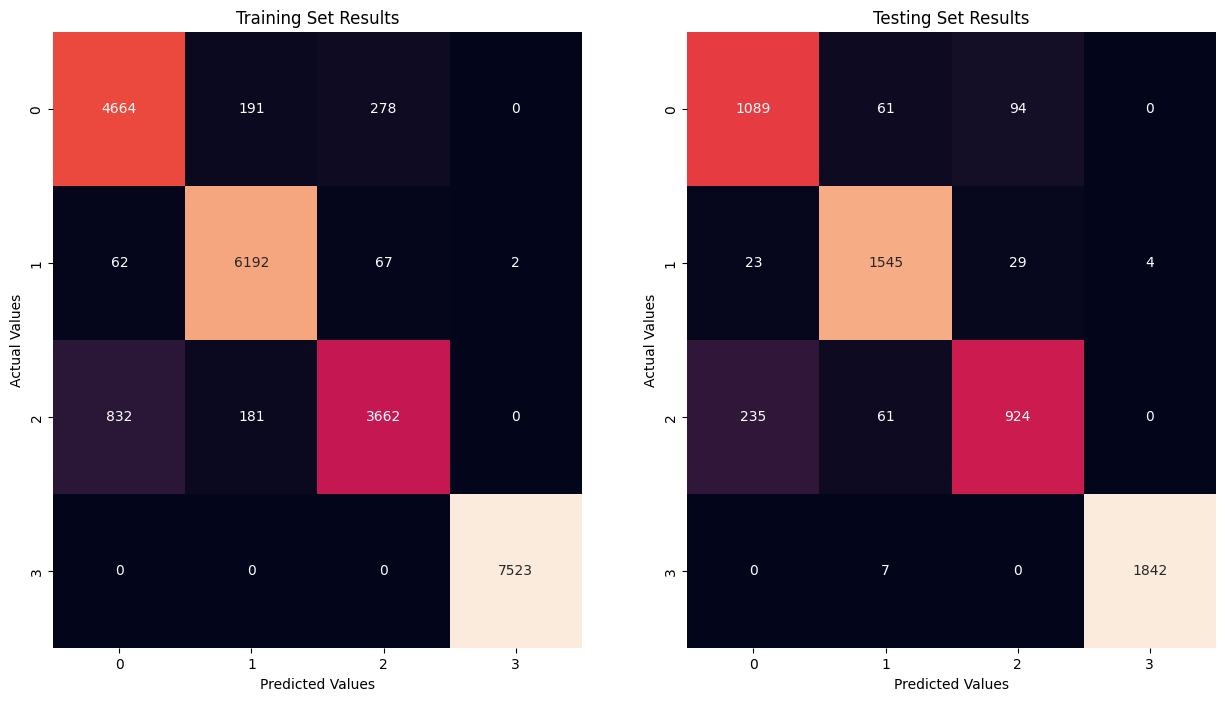

In [47]:
from sklearn import svm
sm = svm.SVC(C=217.89654436207158, kernel='rbf', degree=5, gamma=0.35886830602406034)
sm.fit(X_train, Y_train)
Y_pred = sm.predict(X_test)
#print('cross validation',cross_val_score(sm,X_train,Y_train,cv = 5).mean())
#print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test, sm.predict(X_test)))
model_dict={'Support Vector Machine' : sm}
sm_results = compute_recall_score(model_dict=model_dict)
sm_results2 = compute_scores(model_dict=model_dict)
sm_results3 = compute_accuracy_score(model_dict=model_dict)
print(sm_results)
print (sm_results2)
print(sm_results3)
plot_confusion_matrix(model_dict=model_dict)

In [48]:
# from sklearn.datasets import load_iris
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import cross_val_score
# import optuna

# # Load the dataset

# # Define the objective function
# def objective(trial):
#     # Define the hyperparameters to optimize
#     max_depth = trial.suggest_int('max_depth', 1, 32)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)
#     criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
#     # Train a Decision Tree model with the chosen hyperparameters using cross-validation
#     clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
#     score = cross_val_score(clf, X_train, Y_train, cv=5).mean()

#     return score

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters
# best_params = study.best_params
# print(f'Best hyperparameters: {best_params}')




In [49]:
# from sklearn.tree import DecisionTreeClassifier
# dtree = DecisionTreeClassifier(criterion="entropy", max_depth=27) # được sử dụng theo các thông số  min_samples_split=2 min_samples_leaf=1
# dtree.fit(X_train1,Y_train1)
# Y_pred = dtree.predict(X_test)
# Y_pre_val = dtree.predict(X_val)
# print('val',metrics.accuracy_score(Y_val,Y_pre_val))
# print('cross validation',cross_val_score(dtree,X_train1,Y_train1,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(metrics.classification_report(Y_test, dtree.predict(X_test)))



In [50]:
# import optuna
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split

# def objective(trial):

#     # Define hyperparameters to optimize
#     n_estimators = trial.suggest_int('n_estimators', 1, 100, step=5)
#     max_depth = trial.suggest_int('max_depth', 2, 32, log=True)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])

#     # Create the Random Forest model with the hyperparameters
#     model = RandomForestClassifier(n_estimators=n_estimators,
#                                    max_depth=max_depth,
#                                    min_samples_split=min_samples_split,
#                                    min_samples_leaf=min_samples_leaf,
#                                    max_features=max_features,
#                                    random_state=0)

#     # Train the model on the training data
#     score = cross_val_score(model, X_train, Y_train, cv=5).mean()

#     return score

# # Create a study object and optimize the objective function
# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# # Print the best hyperparameters and accuracy
# print('Best parameters:', study.best_params)
# print('Best accuracy:', study.best_value)


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1244
           1       0.95      0.98      0.96      1601
           2       0.91      0.83      0.87      1220
           3       1.00      1.00      1.00      1849

    accuracy                           0.94      5914
   macro avg       0.93      0.93      0.93      5914
weighted avg       0.94      0.94      0.94      5914

               Test_Recall
Random forest     0.925848
               Test_F1_Score
Random forest        0.92649
               Train_Accuracy  Test_Accuracy
Random forest        0.999239        0.93676


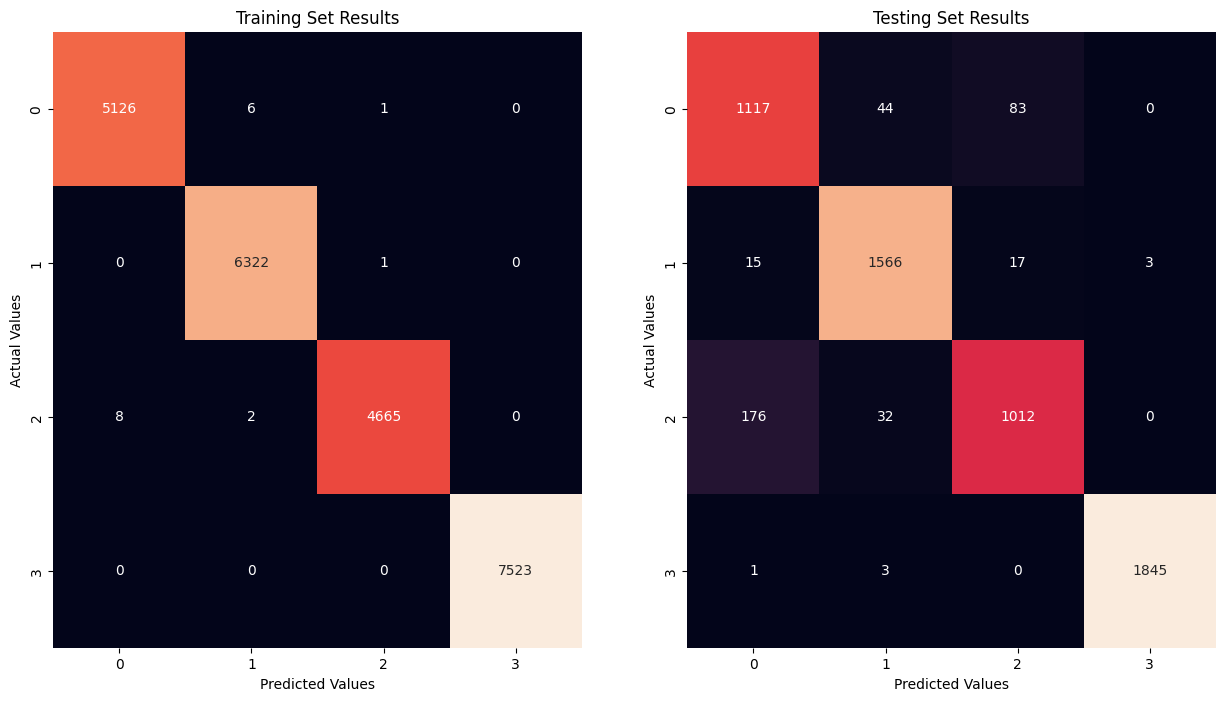

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=27, max_depth=28,min_samples_split=2,min_samples_leaf=1,max_features='sqrt') # estimator là số cây trong random forest ,min_samples_split=2,min_samples_leaf=1,max_features='sqrt'
rf.fit(X_train,Y_train)
Y_pred=rf.predict(X_test)
# print('validation ',metrics.accuracy_score(Y_val,Y_val_pre))
#print('cross validation in training data',cross_val_score(rf,X_train,Y_train,cv = 5).mean())
#print('accuracy in testing data',metrics.accuracy_score(Y_test,Y_pred))
print(metrics.classification_report(Y_test, Y_pred))
model_dict={'Random forest' : rf}
rf_results = compute_recall_score(model_dict=model_dict)
rf_results2 = compute_scores(model_dict=model_dict)
rf_results3 = compute_accuracy_score(model_dict=model_dict)
print (rf_results)
print(rf_results2)
print(rf_results3)
plot_confusion_matrix(model_dict=model_dict)

In [52]:
# from sklearn.neural_network import MLPClassifier
# #nn1 = MLPClassifier(hidden_layer_sizes=(10,27,10),activation='relu', solver='adam', max_iter=1000,random_state=1) # Xây dựng số lớp ẩn, dùng activation là relu là hàm phi tuyên để kích hoạt tính toán ra kết quả
# nn1 = MLPClassifier(hidden_layer_sizes=(23, 28, 14, 19),activation='relu', solver='adam', max_iter=400,random_state=1)
# #solver='adam' - thuật toán tối ưu hóa để cập nhật các trọng số của mạng, trong trường hợp này là Adam.
# nn1.fit(X_train,Y_train)
# Y_pred = nn1.predict(X_test)
# Y_val_pre =nn1.predict(X_val)
# print('val',metrics.accuracy_score(Y_val,Y_val_pre))
# print('cross validation',cross_val_score(nn1,X_train,Y_train,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(metrics.classification_report(Y_test, nn1.predict(X_test)))

In [53]:
# import optuna
# from sklearn.ensemble import GradientBoostingClassifier
# def objective(trial):
#     # Define hyperparameters to optimize
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 50, 500),
#         "learning_rate": trial.suggest_uniform("learning_rate", 0.01, 0.1),
#         "max_depth": trial.suggest_int("max_depth", 3, 10),
#         "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
#         "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
#         "max_features": trial.suggest_uniform("max_features", 0.1, 1.0),
#         "subsample": trial.suggest_uniform("subsample", 0.1, 1.0)
#     }

#     # Create GBDT model
#     model = GradientBoostingClassifier(**params, random_state=0)

#     # Split data into train and validation set
#     # Train model
#     model.fit(X_train, Y_train)

#     # Calculate validation accuracy
#     y_pred = model.predict(X_test)
#     accuracy = accuracy_score(Y_test, y_pred)

#     return accuracy

# # Create study
# study = optuna.create_study(direction="maximize")

# # Optimize objective function
# study.optimize(objective, n_trials=100)

# # Print best hyperparameters and validation accuracy
# print("Best hyperparameters:", study.best_params)
# print("Validation accuracy:", study.best_value)

cross validation in training data:  0.9284688146153102
                    Test_Recall
Gradient Boosting      0.921213
                    Test_F1_Score
Gradient Boosting        0.921847
                    Train_Accuracy  Test_Accuracy
Gradient Boosting              1.0       0.932533


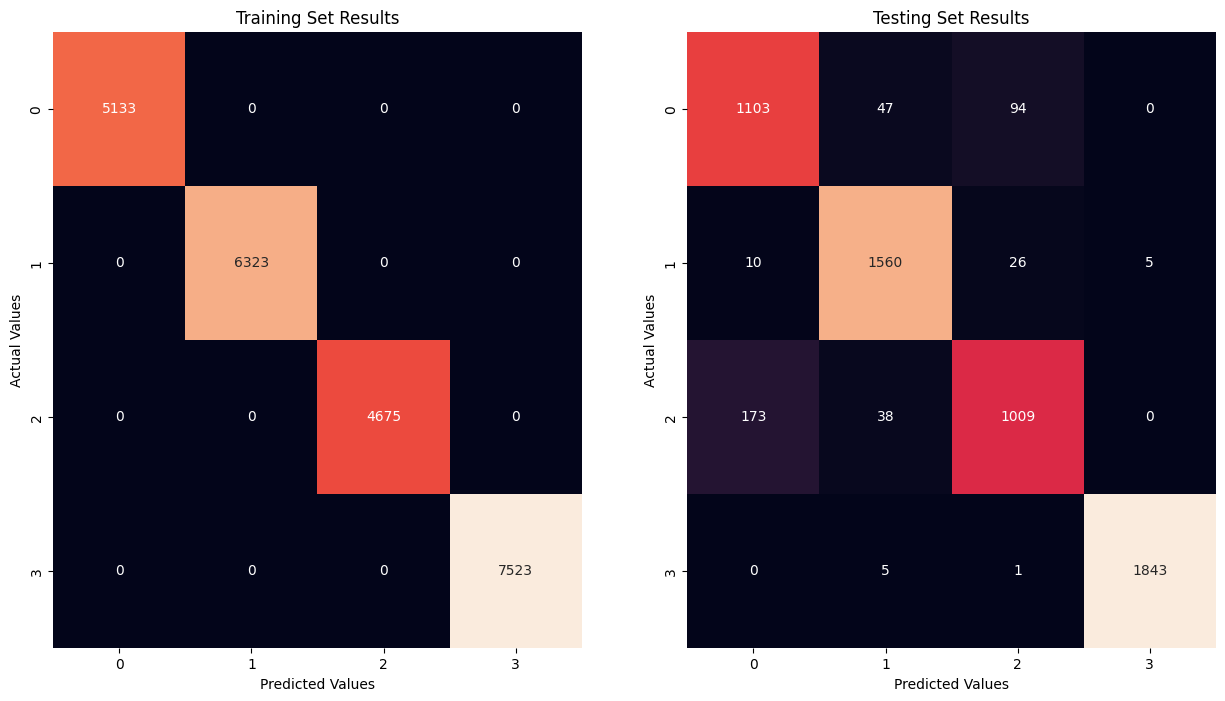

In [54]:
# from sklearn.neural_network import MLPClassifier
# nn2 = MLPClassifier(hidden_layer_sizes=(15,15,15),activation='relu', solver='adam', max_iter=1000,random_state=1)
# #nn2 = MLPClassifier(hidden_layer_sizes=(23, 18, 25, 17),activation='relu', solver='adam', max_iter=850,random_state=1)
# nn2.fit(X_train,Y_train)
# Y_pred = nn2.predict(X_test)
# Y_val_pre = nn2.predict(X_val)
# print('val',metrics.accuracy_score(Y_val,Y_val_pre))
# print('cross validation',cross_val_score(nn2,X_train,Y_train,cv = 5).mean())
# print('accuracy',metrics.accuracy_score(Y_test,Y_pred))
# print(metrics.classification_report(Y_test, nn2.predict(X_test)))
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score
# nb = GaussianNB()#tạo đối tượng Bayes, sử dụng phân phối Gausian để tính xác suất phân loại.
# nb.fit(X_train,Y_train)#Huan luyen mo hinh tren tap du lieu. Hàm fit sẽ tính toán các tham số mô hình để ước tính xác suất phân loại của mô hình.
# Y_pred = nb.predict(X_test) # du doan nhan trong tap kiem tra
# score = cross_val_score(nb,X_train,Y_train,cv=5).mean()
# print(score)# tinh do chinh xac cua mo hinh tren tap du lieu 
# print(metrics.accuracy_score(Y_pred,Y_test))# tinh do chinh xac mo hinh tren tap test
# print(metrics.classification_report(Y_test, nb.predict(X_test)))

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbdt = GradientBoostingClassifier(n_estimators=147, max_depth=10,learning_rate=0.06450229468622692)
gbdt.fit(X_train, Y_train)
Y_pred = gbdt.predict(X_test)
print('cross validation in training data: ',cross_val_score(gbdt,X_train,Y_train,cv = 5).mean())
#print('accuracy in test data:  ',metrics.accuracy_score(Y_test,Y_pred))
#print(metrics.classification_report(Y_test,Y_pred))
model_dict={'Gradient Boosting ' : gbdt}
gbdt_results = compute_recall_score(model_dict=model_dict)
gbdt_results2 = compute_scores(model_dict=model_dict)
gbdt_results3 = compute_accuracy_score(model_dict=model_dict)
print (gbdt_results)
print(gbdt_results2)
print(gbdt_results3)
plot_confusion_matrix(model_dict=model_dict)


In [55]:
import pickle
knn_file = 'knn.sav'
pickle.dump(knn, open(knn_file, 'wb'))
rf_file = 'rf.sav'
pickle.dump(rf, open(rf_file, 'wb'))
svm_file = 'svm.sav'
pickle.dump(sm, open(svm_file, 'wb'))

dtree_file = 'dtree.sav'
pickle.dump(dtree, open(dtree_file, 'wb'))
gbdt_file = 'gbdt.sav'
pickle.dump(gbdt, open(gbdt_file, 'wb'))

scaler_file = 'scaler.sav'
pickle.dump(scaler, open(scaler_file, 'wb'))

In [56]:
from sklearn import model_selection
# loaded_nn1 = pickle.load(open('./training_phase/nn11.sav', 'rb'))
loaded_knn = pickle.load(open('/home/phong/project/machine-learning/training_phase/knn.sav', 'rb'))
loaded_rf = pickle.load(open('/home/phong/project/machine-learning/training_phase/rf.sav', 'rb'))
loaded_svm = pickle.load(open('/home/phong/project/machine-learning/training_phase/svm.sav', 'rb'))
loaded_dtree = pickle.load(open('/home/phong/project/machine-learning/training_phase/dtree.sav', 'rb'))
loaded_gbdt = pickle.load(open('/home/phong/project/machine-learning/training_phase/gbdt.sav', 'rb'))
loaded_scaler = pickle.load(open('/home/phong/project/machine-learning/training_phase/scaler.sav', 'rb'))

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
import numpy as np
# cl7 = KNeighborsClassifier(n_neighbors=16, weights='distance', p= 1)
# # cl7 = GaussianNB()
# cl6 = LogisticRegression(penalty ='l2',C = 611.9717284983775 ,solver='saga')
# cl3 = DecisionTreeClassifier(criterion="entropy", max_depth=27)
# cl4 =RandomForestClassifier(n_estimators=81, max_depth=28,)
# cl5 = svm.SVC(C=217.89654436207158, kernel='rbf', degree=5, gamma=0.35886830602406034)
# cl2 = MLPClassifier(hidden_layer_sizes=(15,15,15),activation='relu', solver='adam', max_iter=1000,random_state=1)
# cl1 = MLPClassifier(hidden_layer_sizes=(23, 28, 14, 19),activation='relu', solver='adam', max_iter=400,random_state=1)
# voting_clf = VotingClassifier(
#     estimators=[
#         ('knn',loaded_nn2),
#         ('rf',loaded_rf),
#         ('svm',loaded_svm),
#         ('logreg',loaded_logreg),
#         ('nb', loaded_nb)
#     ],
#     voting='hard'
# )
voting_clf = VotingClassifier(
    estimators=[
        ('knn',loaded_knn),
        ('rf',loaded_rf),
        ('svm',loaded_svm),
        ('dtree',loaded_dtree),
        ('gbdt', loaded_gbdt)
    ],
    voting='hard'
)
# Huấn luyện mô hình ensemble với dữ liệu huấn luyện
voting_clf.fit(X_train, Y_train)
# print(prediction)
# print('accuracy in test')
# print(accuracy_score(prediction, Y_test))
# score = cross_val_score(voting_clf,X_train1,Y_train1,cv=5).mean()
# print('cross_validation',score)
# print('accuracy in valid data',accuracy_score(predicion_val, Y_val))


VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(n_neighbors=16, p=1,
                                                   weights='distance')),
                             ('rf',
                              RandomForestClassifier(max_depth=28,
                                                     max_features='sqrt',
                                                     n_estimators=27)),
                             ('svm',
                              SVC(C=217.89654436207158, degree=5,
                                  gamma=0.35886830602406034)),
                             ('dtree',
                              DecisionTreeClassifier(max_depth=11,
                                                     min_samples_split=3)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.06450229468622692,
                                                         max_depth=10,
                    

In [58]:
Voting_file = 'voting.sav'
pickle.dump(voting_clf, open(Voting_file, 'wb'))

[3 1 2 ... 2 2 1]
(5914,)
          Test_Recall
Ensemble     0.924685
          Test_F1_Score
Ensemble       0.925367
          Train_Accuracy  Test_Accuracy
Ensemble        0.999366       0.935746


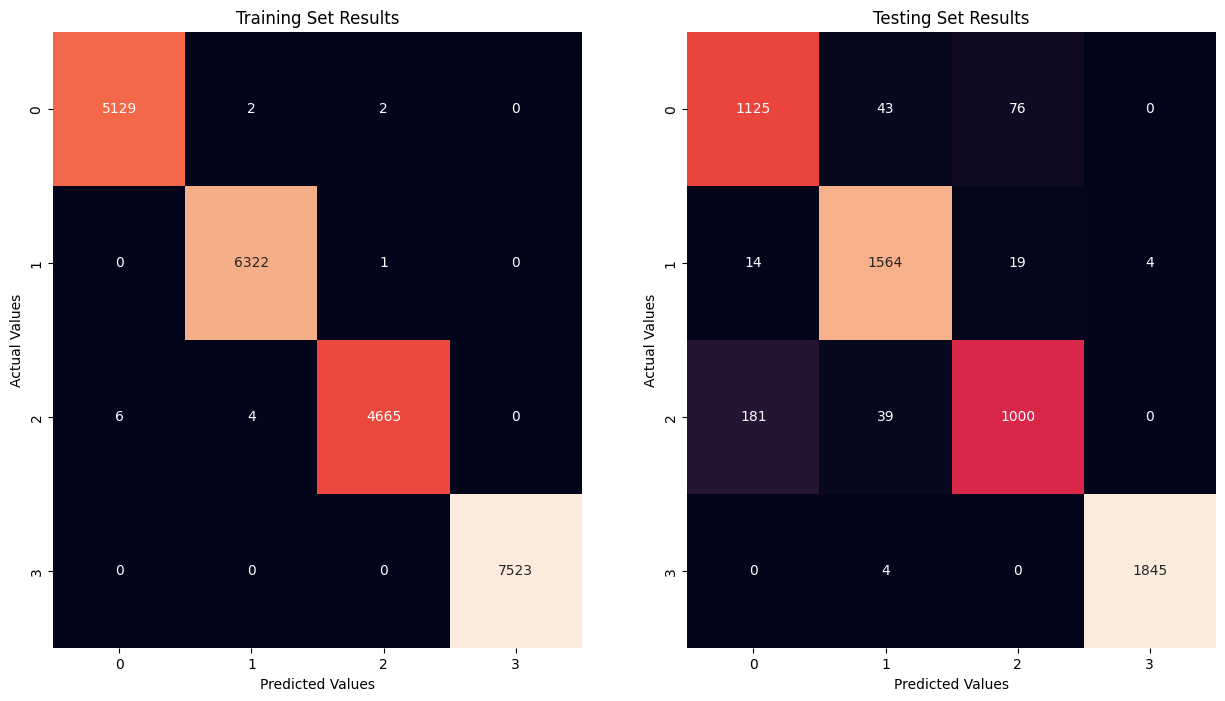

In [59]:
loaded_voting = pickle.load(open('/home/phong/project/machine-learning/training_phase/voting.sav', 'rb'))
vot_arr = loaded_voting.predict(X_test)
print(vot_arr)
print(vot_arr.shape)
# counts = np.bincount(vot_arr)
# most_common = np.argmax(counts)
model_dict={'Ensemble' : loaded_voting}
voting_results = compute_recall_score(model_dict=model_dict)
print (voting_results)
voting_results2 = compute_scores(model_dict=model_dict)
print(voting_results2)
voting_results3 = compute_accuracy_score(model_dict=model_dict)
print(voting_results3)
plot_confusion_matrix(model_dict=model_dict)

In [60]:
final_results = pd.concat((knn_results1, dtree_results, 
                           sm_results, gbdt_results, 
                           rf_results, voting_results
                           ), axis=0).sort_values(by='Test_Recall', ascending=False)
final_results

,Test_Recall
Random forest,0.925848
Ensemble,0.924685
Gradient Boosting,0.921213
Support Vector Machine,0.898504
K_Neighbors,0.893614
decision tree,0.890298


In [61]:
final_results2 = pd.concat((knn_results2, dtree_results2, 
                           sm_results2, gbdt_results2, 
                           rf_results2, voting_results2
                           ), axis=0).sort_values(by='Test_F1_Score', ascending=False)
final_results2

,Test_F1_Score
Random forest,0.926490
Ensemble,0.925367
Gradient Boosting,0.921847
Support Vector Machine,0.899078
K_Neighbors,0.894143
decision tree,0.890238


In [62]:
final_results3 = pd.concat((knn_results3, dtree_results3, 
                           sm_results3, gbdt_results3, 
                           rf_results3, voting_results3
                           ), axis=0).sort_values(by='Test_Accuracy', ascending=False)
final_results3 

,Train_Accuracy,Test_Accuracy
Random forest,0.999239,0.936760
Ensemble,0.999366,0.935746
Gradient Boosting,1.000000,0.932533
Support Vector Machine,0.931809,0.913088
decision tree,0.926144,0.906324
K_Neighbors,1.000000,0.900744
